***LIBRARIES***

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning from Logistic Regression
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Now proceed with your model training and evaluation


# **Data Loading and Exploration**




In [ ]:
# Load and Explore the Dataset
import pandas as pd
data = pd.read_csv('updated_pollution_dataset.csv')
print(data.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


In [ ]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


In [ ]:
print(data.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [ ]:
print(data.columns)

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')


# **Feature and Target Separation**

In [ ]:
# Separate Features and Target
X = data.drop(columns=['Air Quality'])  # Drop 'Air Quality' from features
y = data['Air Quality']

# **Encoding the Target Variable**

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# **Handling Imbalanced Data**

In [ ]:
near_miss = NearMiss()
X_resampled, y_resampled = near_miss.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# **Feature Scaling and Outlier Detection**

In [ ]:
scaler = StandardScaler()
data[['Temperature', 'Humidity', 'Population_Density']] = scaler.fit_transform(data[['Temperature', 'Humidity', 'Population_Density']])

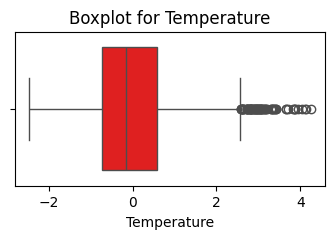

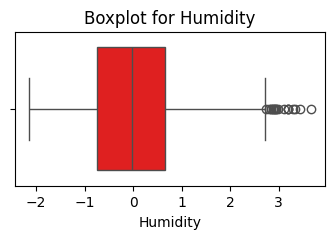

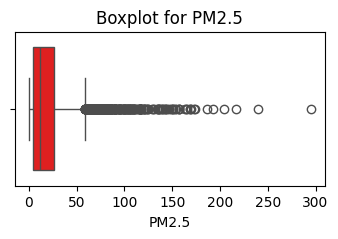

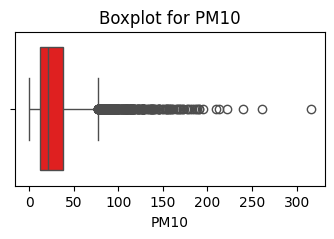

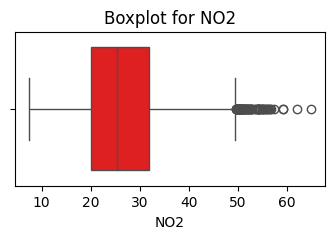

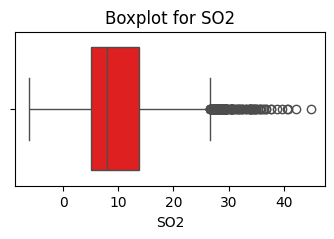

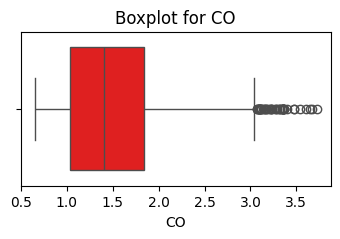

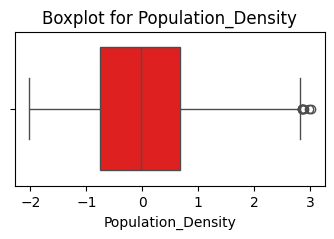

In [ ]:
# List of numerical columns to check for outliers
columns_to_check = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Population_Density']

# Create boxplots to visualize outliers
for col in columns_to_check:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=data[col],color = "red")
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
# Loop through each column to handle outliers
for col in columns_to_check:
    Q1 = data[col].quantile(0.25)  # 25th percentile (Q1)
    Q3 = data[col].quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile range (IQR)

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers in the column
    data1 = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [ ]:
# Check the shape of the dataset to see how many rows remain
print(f"Number of rows after outlier removal: {data1.shape[0]}")

Number of rows after outlier removal: 4993


In [ ]:
# Save the cleaned dataset to a new CSV file
data1.to_csv('cleaned_air_quality_pollution.csv', index=False)

In [ ]:
# Check summary statistics before and after cleaning
print("Before cleaning:")
print(data.describe())  # Original data before cleaning

print("\nAfter cleaning:")
print(data1.describe())  # Cleaned data after removing outliers

Before cleaning:
        Temperature      Humidity        PM2.5         PM10          NO2  \
count  5.000000e+03  5.000000e+03  5000.000000  5000.000000  5000.000000   
mean  -4.007461e-16  4.554579e-16    20.142140    30.218360    26.412100   
std    1.000100e+00  1.000100e+00    24.554546    27.349199     8.895356   
min   -2.474560e+00 -2.147027e+00     0.000000    -0.200000     7.400000   
25%   -7.334863e-01 -7.411504e-01     4.600000    12.300000    20.100000   
50%   -1.531282e-01 -1.614678e-02    12.000000    21.700000    25.300000   
75%    5.909206e-01  6.458130e-01    26.100000    38.100000    31.900000   
max    4.251641e+00  3.659306e+00   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000   

# **Splitting the Dataset**

In [ ]:
# Split data into training, validation, and test sets in one go
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Training and Evaluating the MLP Model**

In [ ]:
# Features and target variable
X = data1.drop('Air Quality', axis=1)  # Features
y = data1['Air Quality']  # Target

# Standardize numerical features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_scaled, y)

# Make predictions (using the same dataset for simplicity)
y_pred = mlp_model.predict(X_scaled)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate the model
print(classification_report(y, y_pred))

Accuracy: 0.9900
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      2000
   Hazardous       0.96      0.96      0.96       493
    Moderate       1.00      1.00      1.00      1500
        Poor       0.97      0.98      0.98      1000

    accuracy                           0.99      4993
   macro avg       0.98      0.98      0.98      4993
weighted avg       0.99      0.99      0.99      4993



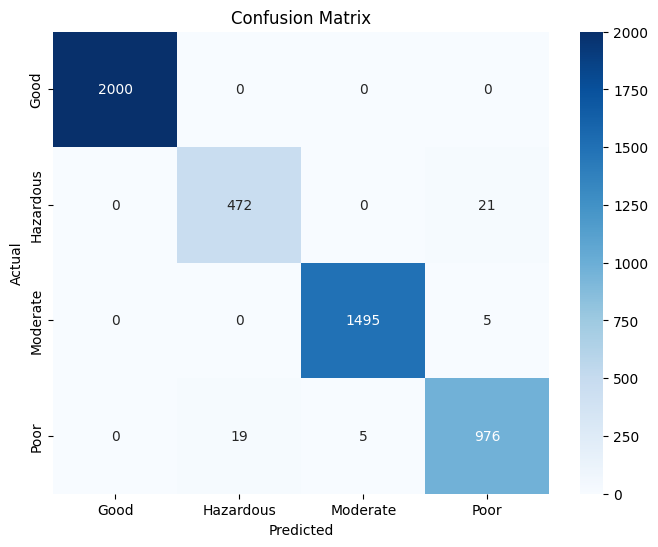

In [ ]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

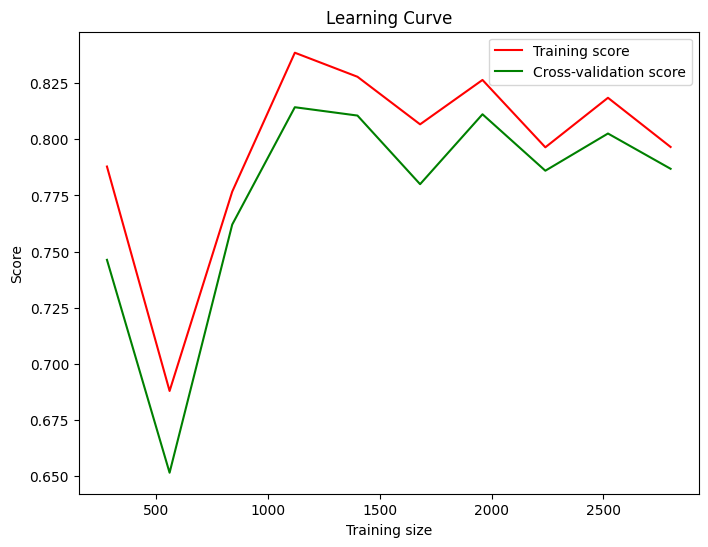

In [ ]:
from sklearn.model_selection import learning_curve
# Plot learning curve
def plot_learning_curve(estimator, X, y, ax, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color="r")
    ax.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score", color="g")
    ax.set_xlabel("Training size")
    ax.set_ylabel("Score")
    ax.set_title(title)
    ax.legend()

# Plot learning curve for MLPClassifier
fig, ax = plt.subplots(figsize=(8, 6))
plot_learning_curve(mlp_model, X_train, y_train, ax)
plt.show()


# **Training and Evaluating SVM**

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.9386666666666666
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       0.91      0.81      0.86        63
           2       0.94      0.93      0.94       226
           3       0.83      0.87      0.85       145

    accuracy                           0.94       750
   macro avg       0.92      0.90      0.91       750
weighted avg       0.94      0.94      0.94       750



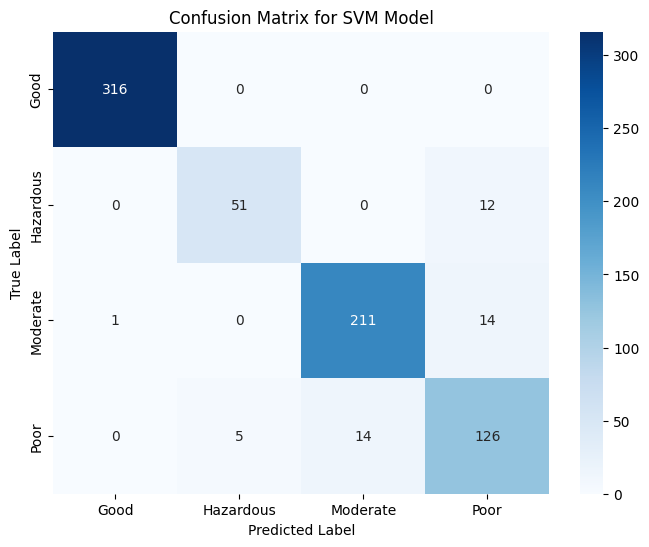

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predictions for the test set
y_pred = svm_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **Training and Evaluating Random Forest**

In [ ]:
# Initialize the RandomForestClassifier with class weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model with original data (without resampling)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
rf_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       0.93      0.84      0.88        63
           2       0.95      0.96      0.95       226
           3       0.87      0.89      0.88       145

    accuracy                           0.95       750
   macro avg       0.94      0.92      0.93       750
weighted avg       0.95      0.95      0.95       750



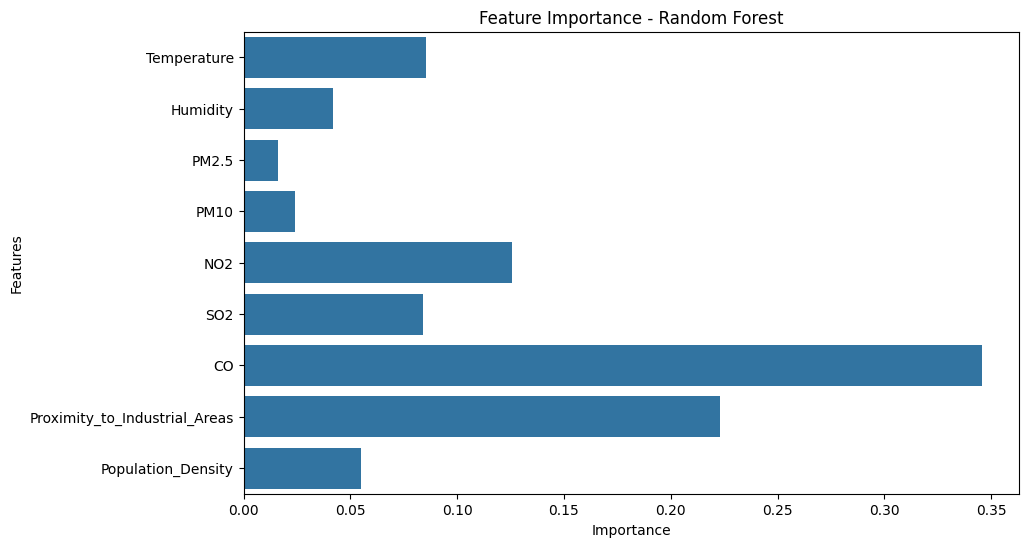

In [ ]:
# Feature importance for Random Forest
feature_importances = model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# **Model Evaluation: Gradient Boosting and Stacking Classifier**

In [ ]:
# Define a function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))

    print(f"{model_name} Accuracy Score:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} Confusion Matrix:")
    print(conf_matrix)

    return conf_matrix

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42) # Initialize the model
gb_model.fit(X_train, y_train) # Train the model
y_pred_gb = gb_model.predict(X_test) # Make predictions and store in y_pred_gb

# Evaluate Gradient Boosting model
print("Evaluating Gradient Boosting Model:")
conf_matrix_gb = evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')

estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]
# Define stacking classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Evaluate Stacking model
print("\nEvaluating Stacking Model:")


conf_matrix_stack = evaluate_model(y_test, y_pred_stack, 'Stacking')

Evaluating Gradient Boosting Model:

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       316
           1       0.87      0.86      0.86        63
           2       0.95      0.93      0.94       226
           3       0.85      0.88      0.86       145

    accuracy                           0.94       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.94      0.94      0.94       750

Gradient Boosting Accuracy Score:
Accuracy: 0.9427

Gradient Boosting Confusion Matrix:
[[316   0   0   0]
 [  0  54   0   9]
 [  2   0 210  14]
 [  0   8  10 127]]

Evaluating Stacking Model:

Stacking Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       0.88      0.84      0.86        63
           2       0.96      0.94      0.95       226
           3       0.85      0.88      0.86 

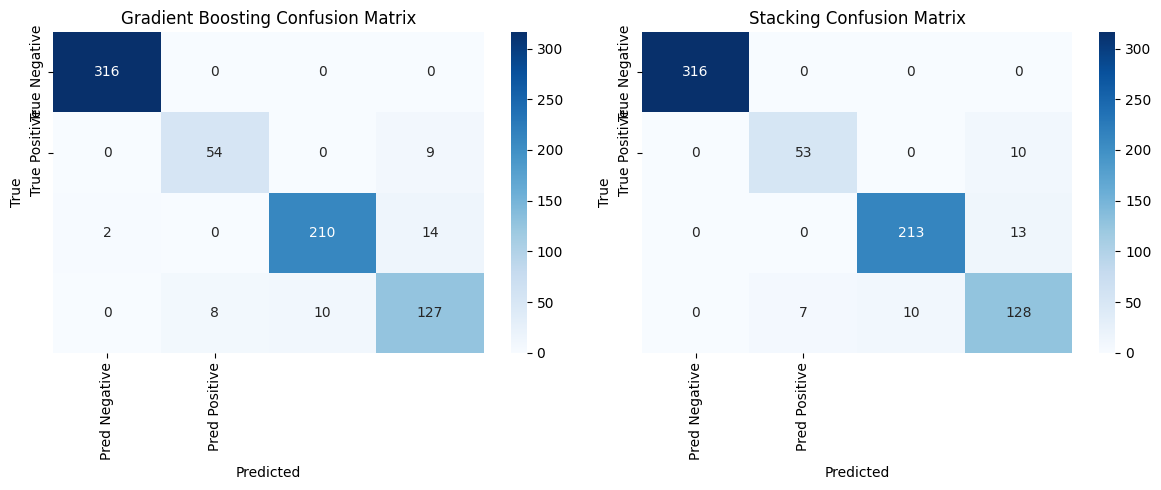

In [ ]:
# Modify the function to work with subplots
def plot_confusion_matrix(ax, conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'], ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot confusion matrices in subplots
plot_confusion_matrix(axes[0], conf_matrix_gb, 'Gradient Boosting')
plot_confusion_matrix(axes[1], conf_matrix_stack, 'Stacking')

# Adjust layout
plt.tight_layout()
plt.show()

# **Model Comparison: Logistic Regression, SVM, and Random Forest**

In [ ]:
# 2Model logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

# Train and predict for the SVM model
svm_model = SVC(kernel='linear', random_state=42,probability=True) # Define the SVM model
svm_model.fit(X_train, y_train) # Train the SVM model
y_pred_svm = svm_model.predict(X_test) # Get predictions from the SVM model

# ACCURACY BETWEEN MODEL
print("\nComparison of Accuracies:")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Logistic Regression: {lr_accuracy:.2f}")
print(f"Random Forest: {rf_accuracy:.2f}")

Logistic Regression Accuracy: 0.7573333333333333
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       316
           1       0.40      0.33      0.37        63
           2       0.75      0.72      0.73       226
           3       0.48      0.54      0.50       145

    accuracy                           0.76       750
   macro avg       0.65      0.64      0.64       750
weighted avg       0.76      0.76      0.76       750


Comparison of Accuracies:
SVM: 0.94
Logistic Regression: 0.76
Random Forest: 0.95


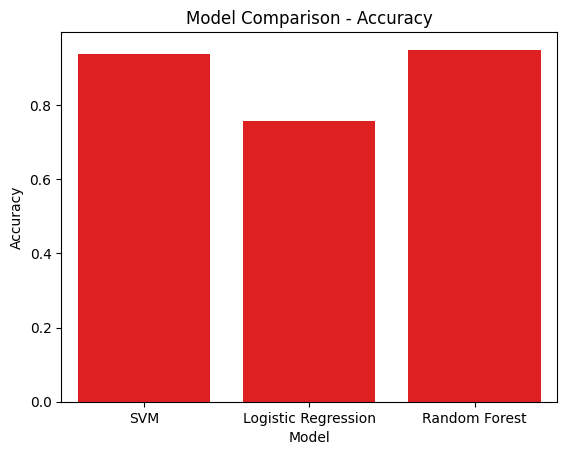

In [ ]:
# List of models
models = [("SVM", SVC(kernel='linear')), ("Logistic Regression", LogisticRegression()), ("Random Forest", RandomForestClassifier())]

# Evaluate each model
results = [{"Model": name, "Accuracy": accuracy_score(y_test, model.fit(X_train, y_train).predict(X_test))} for name, model in models]

# Plot the results
sns.barplot(x='Model', y='Accuracy', data=pd.DataFrame(results),color = "red")
plt.title('Model Comparison - Accuracy')
plt.show()

# **testing on new data**




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assuming your cleaned dataset is loaded and preprocessed
# Here is a synthetic dataset for testing as an example:
data_test = {
    'Temperature': np.random.uniform(15, 35, 1000),  # Random temperatures between 15 and 35
    'Humidity': np.random.uniform(30, 90, 1000),  # Random humidity between 30% and 90%
    'PM2.5': np.random.uniform(5, 150, 1000),  # Random PM2.5 values between 5 and 150
    'PM10': np.random.uniform(10, 200, 1000),  # Random PM10 values between 10 and 200
    'NO2': np.random.uniform(10, 200, 1000),  # Random NO2 values between 10 and 200
    'SO2': np.random.uniform(5, 50, 1000),  # Random SO2 values between 5 and 50
    'CO': np.random.uniform(0.1, 1.5, 1000),  # Random CO values between 0.1 and 1.5
    'Population_Density': np.random.uniform(500, 10000, 1000),  # Random population density
    'Air Quality': np.random.choice(['Good', 'Bad'], 1000)  # Random target variable
}

# Create a DataFrame
df = pd.DataFrame(data_test)

# Display the first few rows of the DataFrame
print(df.head())

# Separate features and target variable
X_new = df.drop(columns=['Air Quality'])  # Features
y_new = df['Air Quality']  # Target variable

# Scale the features using StandardScaler (same scaler as used during training)
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Encoding the target variable using LabelEncoder (assuming the same encoding as in training)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)  # Transform the labels to numerical values

# Define hyperparameter grid for Random Forest model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# For testing: Fit the GridSearchCV on the new data (X_new_scaled and y_new_encoded)
grid_search_rf.fit(X_new_scaled, y_new_encoded)

# Best parameters and accuracy from GridSearchCV
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest Accuracy on New Data: {grid_search_rf.best_score_}")

# Predict on the new data using the best model
y_pred_new_rf = grid_search_rf.best_estimator_.predict(X_new_scaled)

# Evaluate Random Forest on new data
print(f"Random Forest Accuracy on New Data: {accuracy_score(y_new_encoded, y_pred_new_rf):.4f}")
print(f"Random Forest Classification Report on New Data:\n{classification_report(y_new_encoded, y_pred_new_rf)}")


   Temperature   Humidity       PM2.5        PM10         NO2        SO2  \
0    27.975923  57.038895   39.500819   53.213712   45.605325  35.295162   
1    31.032588  52.946105  132.065247   50.875472   70.931299   6.915685   
2    27.322124  84.818405  103.432632  136.604803  166.457035  11.155066   
3    18.137832  44.049440   45.591200   45.387535   76.815573  26.861003   
4    32.063248  64.656654   40.107510  135.697033  147.467158  14.352296   

         CO  Population_Density Air Quality  
0  0.856158         3030.608533        Good  
1  1.005983         2624.202160        Good  
2  1.002774         2849.223472         Bad  
3  1.042934         5615.565473        Good  
4  1.050976         3267.477216        Good  
Best Random Forest Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best Random Forest Accuracy on New Data: 0.49899999999999994
Random Forest Accuracy on New Data: 1.0000
Random Forest Classification Report on New